In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
x_train=pd.read_csv("Linear_X_Train.csv")
y_train=pd.read_csv("Linear_Y_Train.csv")
x_test=pd.read_csv("Linear_X_Test.csv")

print(type(x_train))
print(type(y_train))
print(type(x_test))
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3750, 1)
(3750, 1)
(1250, 1)
[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


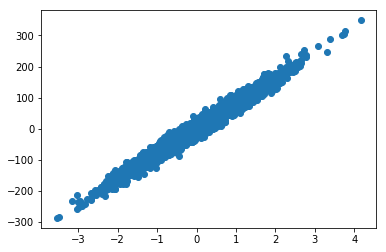

In [3]:
#Normalization
x_train=(x_train-x_train.mean())/x_train.std()
plt.scatter(x_train,y_train)
plt.show()


In [4]:
print(y_train[0])

[-0.09110112]


In [5]:
def hypothesis(xi,theta):    
    return theta[0] + theta[1]*xi

def error(x,y,theta):
    error=0
    m=x.shape[0]
    for i in range(m):
        y_predicted = hypothesis(x[i],theta)
        error += (1/m)*(y[i]-y_predicted)**2
    
    return error

def gradient(x,y,theta):
    
    grad = np.zeros((2,))
    m = x.shape[0]
    for i in range(m):
        y_predicted = hypothesis(x[i],theta)
        grad[0] += (2/m)*(y[i]-y_predicted)*(-1)
        grad[1] += (2/m)*(y[i]-y_predicted)*(-x[i])
    
    return grad

def gradient_descent(x,y,learning_rate=0.001):
    
    theta = np.zeros((2,))
    
    max_itr=5000
    
    error_list = []
    for i in range(max_itr):
       
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        theta[0]= theta[0] - learning_rate*grad[0]
        theta[1]= theta[1] - learning_rate*grad[1]
        
    return theta,error_list 
    

In [8]:
final_theta,error_list = gradient_descent(x_train,y_train,0.001)

In [9]:
print(final_theta)

[ 0.68383823 79.90214537]


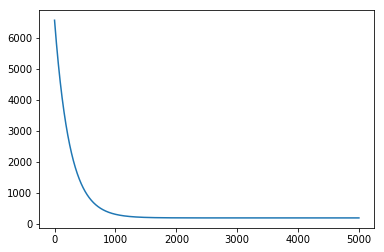

In [10]:
plt.plot(error_list)
plt.show()

In [72]:
data_points = x_test.shape[0]

predictions = []


for i in range(data_points):
    predictions.append(hypothesis(x_test[i][0],final_theta))

output=np.array(predictions)
print(output)
np.savetxt("predictions.csv",output,header="y",delimiter=",",comments="")
print()


[-149.36794934  -68.75367625 -201.48316568 ...   10.91193776  -21.53196168
  -53.68361327]

